<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

## Summary:

### Data Analysis Key Findings

* The iris dataset was successfully loaded and prepared, focusing on 'petal length (cm)' and 'petal width (cm)' features, which were then scaled using `MinMaxScaler`.
* The elbow method and silhouette analysis were used to determine the optimal number of clusters for the scaled petal features.
* Based on the silhouette scores calculated for k from 2 to 9, the highest score (0.7417) was observed at k=2.
* K-Means clustering was applied using the determined optimal number of clusters (k=2) to segment the data points based on their scaled petal length and width.
* The resulting clusters and their respective centroids were successfully visualized, showing the separation of data points into two distinct groups based on the chosen features.

### Insights or Next Steps

* The analysis strongly suggests that the iris dataset, when considering only petal length and width, naturally forms two distinct clusters. This aligns well with the visual separation often observed in these features for different iris species.
* Further analysis could involve applying K-Means with 3 clusters (since the iris dataset contains 3 species) to see how well the clustering aligns with the actual species labels and evaluate its performance using metrics like adjusted Rand index or homogeneous score.

## Visualize the clusters

### Subtask:
Plot the clusters and their centroids.

**Reasoning**:
Plot the clusters and their centroids on a scatter plot.

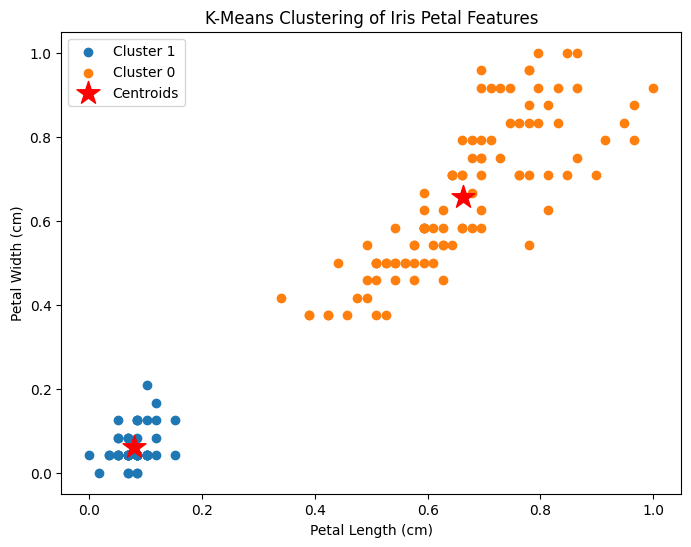

In [19]:
plt.figure(figsize=(8, 6))

for cluster_label in df_petal['cluster'].unique():
    plt.scatter(df_petal[df_petal['cluster'] == cluster_label]['petal length (cm)'],
                df_petal[df_petal['cluster'] == cluster_label]['petal width (cm)'],
                label=f'Cluster {cluster_label}')

plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Petal Features')
plt.legend()
plt.show()

## Apply k-means

### Subtask:
Fit the K-Means model with the optimal number of clusters.

**Reasoning**:
Fit the KMeans model with the optimal number of clusters, predict the clusters, and add the cluster labels to the dataframe.

In [18]:
final_km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_predicted = final_km.fit_predict(df_petal)
# Use .loc to avoid SettingWithCopyWarning
df_petal.loc[:, 'cluster'] = y_predicted
display(df_petal.head())

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


## Determine optimal k

### Subtask:
Use the elbow method and silhouette score to find the optimal number of clusters.

**Reasoning**:
Implement the elbow method and silhouette score calculation as described in the instructions to find the optimal number of clusters and then plot the results.

For k = 2, Silhouette Score: 0.7417
For k = 3, Silhouette Score: 0.6763
For k = 4, Silhouette Score: 0.6004
For k = 5, Silhouette Score: 0.5764
For k = 6, Silhouette Score: 0.5828
For k = 7, Silhouette Score: 0.5793
For k = 8, Silhouette Score: 0.5920
For k = 9, Silhouette Score: 0.4475


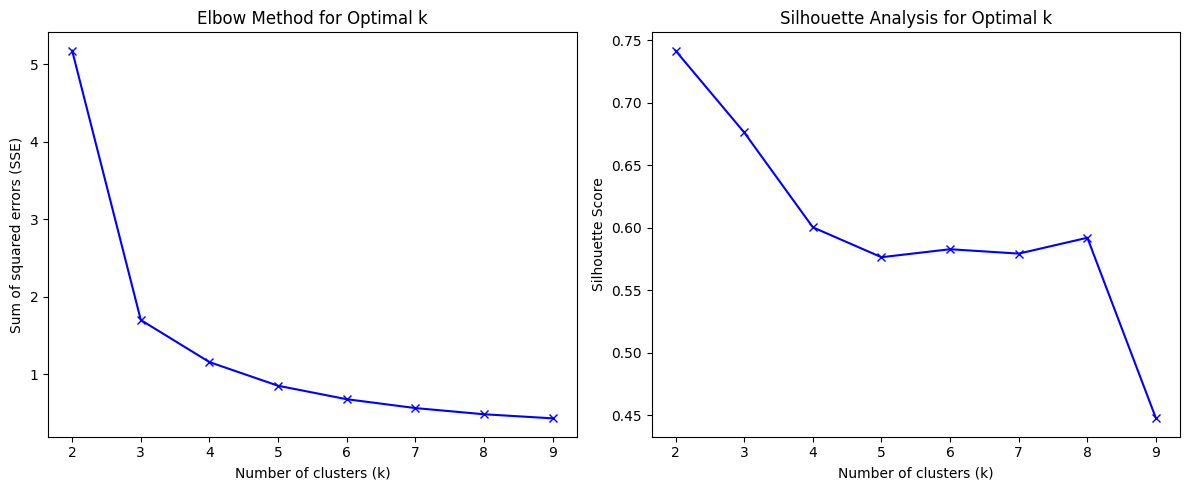


Optimal number of clusters (based on silhouette score): 2


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from matplotlib import pyplot as plt

sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_petal)
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df_petal, km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

## Preprocess the data

### Subtask:
Apply scaling to the features using `MinMaxScaler`.

**Reasoning**:
Import MinMaxScaler and then apply scaling to the features using MinMaxScaler.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Use .loc to avoid SettingWithCopyWarning
df_petal.loc[:, ['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_petal[['petal length (cm)', 'petal width (cm)']])
display(df_petal.head())

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


**Reasoning**:
Create a pandas DataFrame from the iris dataset and display the first few rows.

In [11]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Prepare the data

### Subtask:
Create a DataFrame with 'petal length (cm)' and 'petal width (cm)' features.

**Reasoning**:
Create a new DataFrame with only the petal length and petal width columns and display the head.

In [12]:
df_petal = df[['petal length (cm)', 'petal width (cm)']]
display(df_petal.head())

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Load the dataset

### Subtask:
Load the iris dataset from `sklearn.datasets`.

**Reasoning**:
Load the iris dataset and examine its structure.

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

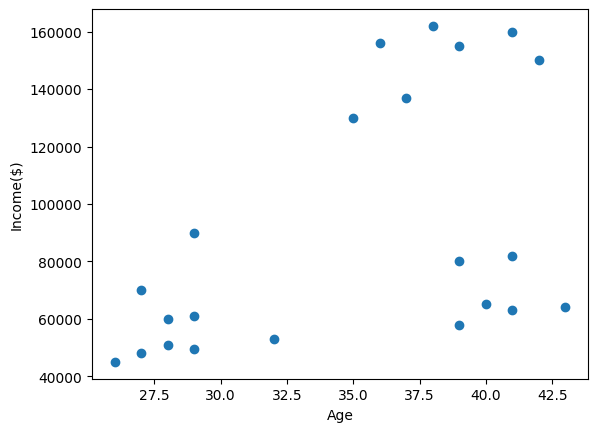

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

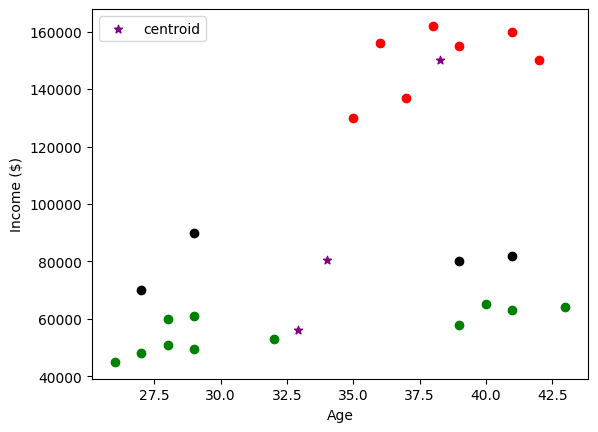

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


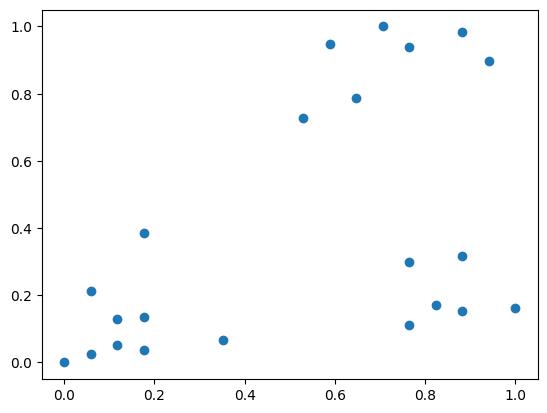

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

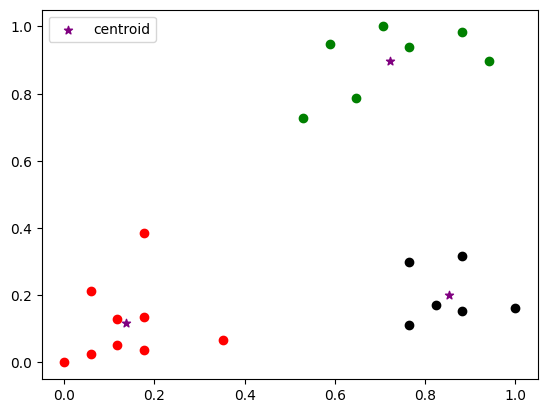

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

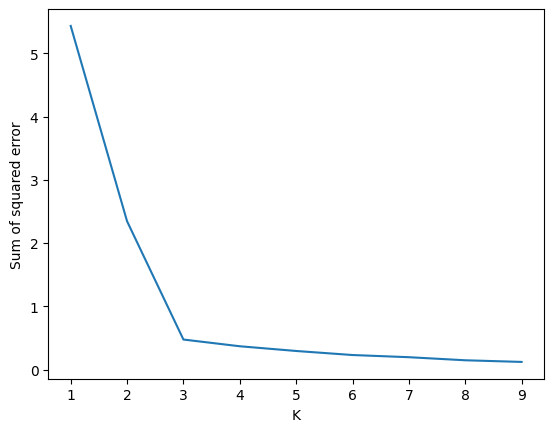

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)



---



For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


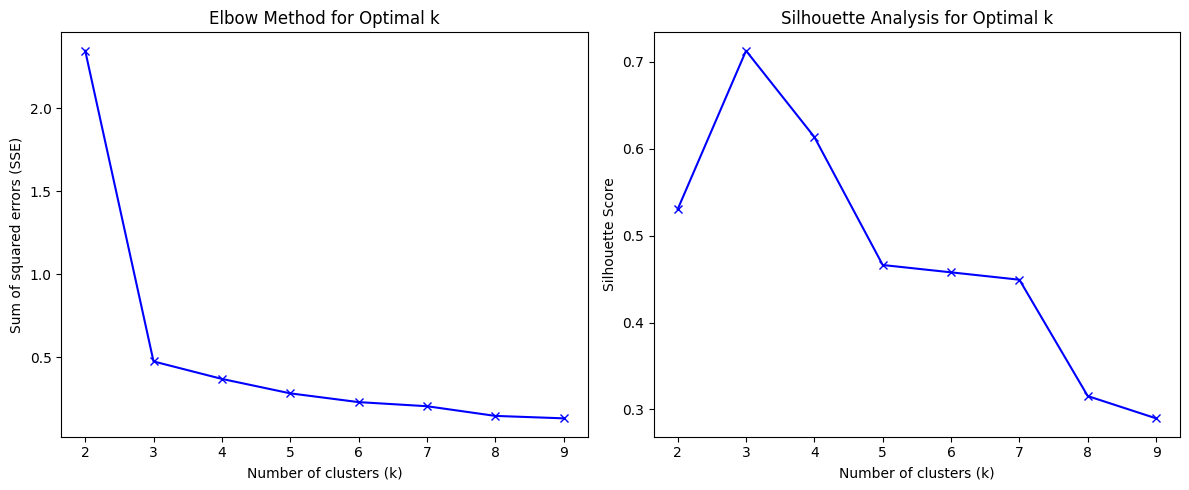


Optimal number of clusters (based on silhouette score): 3


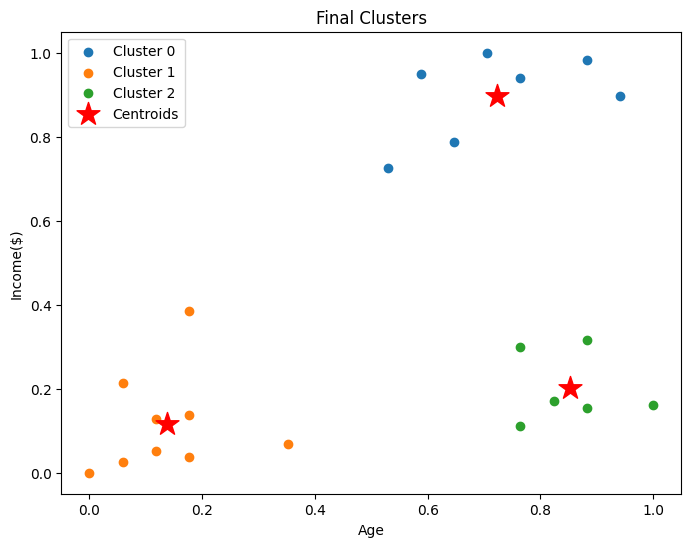

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

# Task
Analyze the iris dataset to find the optimal number of clusters using the elbow method and silhouette score, then apply K-Means clustering to the 'petal length (cm)' and 'petal width (cm)' features and visualize the results.

## Load the dataset

### Subtask:
Load the iris dataset from `sklearn.datasets`.


**Reasoning**:
Load the iris dataset and examine its structure.



In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


**Reasoning**:
Create a pandas DataFrame from the iris dataset and display the first few rows.



In [2]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Prepare the data

### Subtask:
Create a DataFrame with 'petal length (cm)' and 'petal width (cm)' features.


**Reasoning**:
Create a new DataFrame with only the petal length and petal width columns and display the head.



In [3]:
df_petal = df[['petal length (cm)', 'petal width (cm)']]
display(df_petal.head())

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Preprocess the data

### Subtask:
Apply scaling to the features using `MinMaxScaler`.


**Reasoning**:
Apply Min-Max scaling to the petal length and petal width columns in the df_petal DataFrame.



In [20]:
scaler = MinMaxScaler()
df_petal[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_petal[['petal length (cm)', 'petal width (cm)']])
display(df_petal.head())

/tmp/ipython-input-730502467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_petal[['petal length (cm)', 'petal width (cm)']])


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


**Reasoning**:
Import MinMaxScaler and then apply scaling to the features using MinMaxScaler.



In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_petal[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_petal[['petal length (cm)', 'petal width (cm)']])
display(df_petal.head())

/tmp/ipython-input-648350493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df_petal[['petal length (cm)', 'petal width (cm)']])


,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


## Determine optimal k

### Subtask:
Use the elbow method and silhouette score to find the optimal number of clusters.


**Reasoning**:
Implement the elbow method and silhouette score calculation as described in the instructions to find the optimal number of clusters and then plot the results.



In [6]:
sse = []
silhouette_scores = []
k_rng = range(2, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # Add n_init explicitly
    km.fit(df_petal)
    sse.append(km.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(df_petal, km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

NameError: name 'KMeans' is not defined

**Reasoning**:
The previous code failed because KMeans was not imported. I need to import KMeans and also silhouette_score and numpy which were used but not imported in the previous code block. Then, I will rerun the code to calculate and plot the elbow method and silhouette scores.



For k = 2, Silhouette Score: 0.7417
For k = 3, Silhouette Score: 0.6763
For k = 4, Silhouette Score: 0.6004
For k = 5, Silhouette Score: 0.5764
For k = 6, Silhouette Score: 0.5828
For k = 7, Silhouette Score: 0.5793
For k = 8, Silhouette Score: 0.5920
For k = 9, Silhouette Score: 0.4475


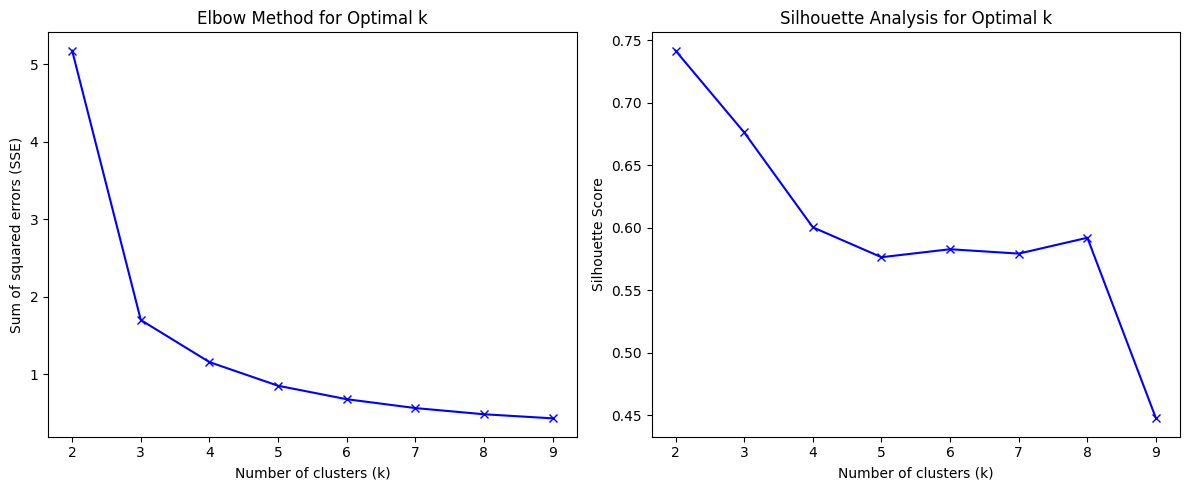


Optimal number of clusters (based on silhouette score): 2


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from matplotlib import pyplot as plt


sse = []
silhouette_scores = []
k_rng = range(2, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_petal)
    sse.append(km.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(df_petal, km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

## Apply k-means

### Subtask:
Fit the K-Means model with the optimal number of clusters.


**Reasoning**:
Fit the KMeans model with the optimal number of clusters, predict the clusters, and add the cluster labels to the dataframe.



In [8]:
final_km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_predicted = final_km.fit_predict(df_petal)
df_petal['cluster'] = y_predicted
display(df_petal.head())

/tmp/ipython-input-2335443531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petal['cluster'] = y_predicted


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


## Visualize the clusters

### Subtask:
Plot the clusters and their centroids.


**Reasoning**:
Plot the clusters and their centroids on a scatter plot.



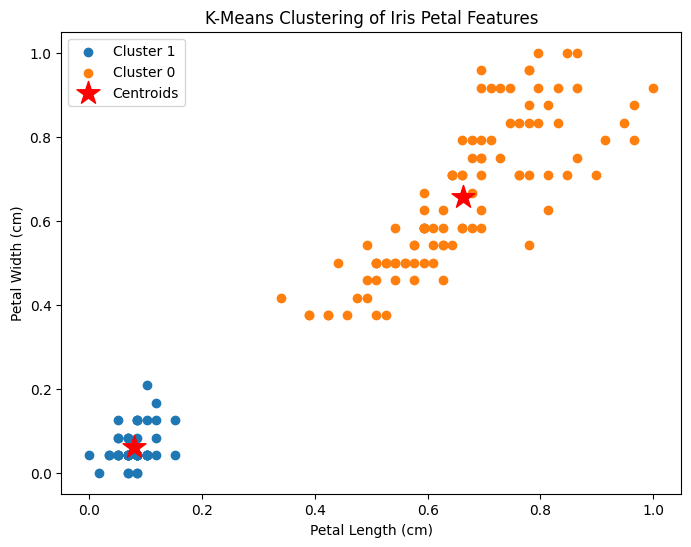

In [9]:
plt.figure(figsize=(8, 6))

for cluster_label in df_petal['cluster'].unique():
    plt.scatter(df_petal[df_petal['cluster'] == cluster_label]['petal length (cm)'],
                df_petal[df_petal['cluster'] == cluster_label]['petal width (cm)'],
                label=f'Cluster {cluster_label}')

plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Petal Features')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The iris dataset was successfully loaded and prepared, focusing on 'petal length (cm)' and 'petal width (cm)' features, which were then scaled using `MinMaxScaler`.
*   The elbow method and silhouette analysis were used to determine the optimal number of clusters for the scaled petal features.
*   Based on the silhouette scores calculated for k from 2 to 9, the highest score (0.7417) was observed at k=2.
*   K-Means clustering was applied using the determined optimal number of clusters (k=2) to segment the data points based on their scaled petal length and width.
*   The resulting clusters and their respective centroids were successfully visualized, showing the separation of data points into two distinct groups based on the chosen features.

### Insights or Next Steps

*   The analysis strongly suggests that the iris dataset, when considering only petal length and width, naturally forms two distinct clusters. This aligns well with the visual separation often observed in these features for different iris species.
*   Further analysis could involve applying K-Means with 3 clusters (since the iris dataset contains 3 species) to see how well the clustering aligns with the actual species labels and evaluate its performance using metrics like adjusted Rand index or homogeneous score.
